### For Images 

In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2

font = cv2.FONT_HERSHEY_COMPLEX

Threshold = 0.5
image_size = 320


def final_prediction(prediction_box , bounding_box , confidence , class_labels,width_ratio,height_ratio):
    for k in prediction_box.flatten():
        x , y , w , h = bounding_box[k]
        x = int(x * width_ratio)
        y = int(y * height_ratio)
        w = int(w * width_ratio)
        h = int(h * height_ratio)
        conf_level = str(round(confidence[k] , 2))
        label = str(classes_names[class_labels[k]])
        cv2.rectangle(image , (x,y),(x+w , y+h),(0,255,0),2)
        cv2.putText(image ,label+' '+conf_level,(x,y-2),font,1,(0,0,255),1)

def bounding_box_prediction(output_data):
    bounding_box = []
    class_labels = []
    confidence_score = []
    for i in output_data:
        for j in i:
            high_label = j[5:]
            classes_ids = np.argmax(high_label)
            confidence = high_label[classes_ids]
            
            if confidence > Threshold:
                w , h = int(j[2] * image_size) , int(j[3] * image_size)
                x , y = int(j[0] * image_size - w/2) , int(j[1] * image_size - h/2)
                bounding_box.append([x,y,w,h])
                class_labels.append(classes_ids)
                confidence_score.append(confidence)

    prediction_boxes = cv2.dnn.NMSBoxes(bounding_box , confidence_score , Threshold , .6)    
    return prediction_boxes , bounding_box ,confidence_score,class_labels





image = cv2.imread('./testing_images/car_image.jpg')
#cv2.imshow('image',image)
#cv2.waitKey()
#cv2.destroyAllWindows()
original_with , original_height = image.shape[1] , image.shape[0]

Neural_Network = cv2.dnn.readNetFromDarknet('./Files/yolov3.cfg','./Files/yolov3.weights')
classes_names = []
k = open('./Files/class_names','r')
for i in k.readlines():
    classes_names.append(i.strip())
#print(classes_names)
blob = cv2.dnn.blobFromImage(image , 1/255 , (320,320) , True , crop = False)
#print(blob.shape)
Neural_Network.setInput(blob)
cfg_data = Neural_Network.getLayerNames()
#print(cfg_data)
layer_names = Neural_Network.getUnconnectedOutLayers()
outputs = [cfg_data[i-1] for i in layer_names]
#print(outputs)
output_data = Neural_Network.forward(outputs)
prediction_box , bounding_box , confidence , class_labels = bounding_box_prediction(output_data)

final_prediction(prediction_box , bounding_box , confidence , class_labels , original_with / 320 , original_height / 320 )

In [10]:
cv2.imshow('prediction ',image)
cv2.waitKey()
cv2.destroyAllWindows()

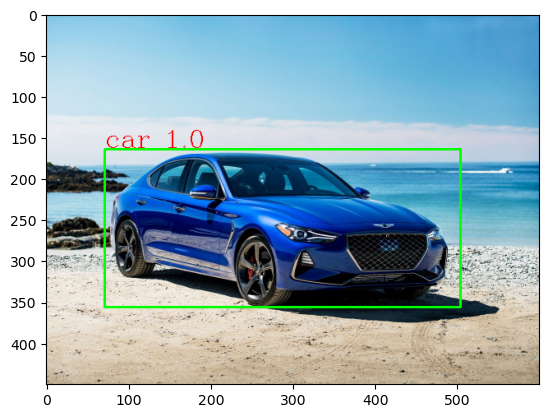

In [11]:
plt.imshow(image[:,:,::-1])

## for videos 

In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2

font = cv2.FONT_HERSHEY_COMPLEX

Threshold = 0.3
image_size = 320


def final_prediction(prediction_box , bounding_box , confidence , class_labels,width_ratio,height_ratio):
    if len(prediction_box) > 0:
        for k in prediction_box.flatten():
            x , y , w , h = bounding_box[k]
            x = int(x * width_ratio)
            y = int(y * height_ratio)
            w = int(w * width_ratio)
            h = int(h * height_ratio)
            conf_level = str(round(confidence[k] , 2))
            label = str(classes_names[class_labels[k]])
            cv2.rectangle(frame , (x,y),(x+w , y+h),(0,255,0),2)
            cv2.putText(frame ,label+' '+conf_level,(x,y-2),font,.5,(0,0,255),1)

def bounding_box_prediction(output_data):
    bounding_box = []
    class_labels = []
    confidence_score = []
    for i in output_data:
        for j in i:
            high_label = j[5:]
            classes_ids = np.argmax(high_label)
            confidence = high_label[classes_ids]
            
            if confidence > Threshold:
                w , h = int(j[2] * image_size) , int(j[3] * image_size)
                x , y = int(j[0] * image_size - w/2) , int(j[1] * image_size - h/2)
                bounding_box.append([x,y,w,h])
                class_labels.append(classes_ids)
                confidence_score.append(confidence)

    prediction_boxes = cv2.dnn.NMSBoxes(bounding_box , confidence_score , Threshold , .3)    
    return prediction_boxes , bounding_box ,confidence_score,class_labels





image = cv2.VideoCapture('./testing_images/car_counting.mp4')
while image.read():
    res , frame = image.read()
    if res == True:
        original_with , original_height = frame.shape[1] , frame.shape[0]

        Neural_Network = cv2.dnn.readNetFromDarknet('./Files/yolov3.cfg','./Files/yolov3.weights')
        classes_names = []
        k = open('./Files/class_names','r')
        for i in k.readlines():
            classes_names.append(i.strip())
        #print(classes_names)
        blob = cv2.dnn.blobFromImage(frame , 1/255 , (320,320) , True , crop = False)
        #print(blob.shape)
        Neural_Network.setInput(blob)
        cfg_data = Neural_Network.getLayerNames()
        #print(cfg_data)
        layer_names = Neural_Network.getUnconnectedOutLayers()
        outputs = [cfg_data[i-1] for i in layer_names]
        #print(outputs)
        output_data = Neural_Network.forward(outputs)
        prediction_box , bounding_box , confidence , class_labels = bounding_box_prediction(output_data)

        final_prediction(prediction_box , bounding_box , confidence , class_labels , original_with / 320 , original_height / 320 )
        
        cv2.imshow('YOLO Algorithm', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break 

image.release()
cv2.destroyAllWindows()


## Saving each frame 

In [41]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2

font = cv2.FONT_HERSHEY_COMPLEX

Threshold = 0.3
image_size = 320


def final_prediction(prediction_box , bounding_box , confidence , class_labels,width_ratio,height_ratio):
    if len(prediction_box) > 0:
        for k in prediction_box.flatten():
            x , y , w , h = bounding_box[k]
            x = int(x * width_ratio)
            y = int(y * height_ratio)
            w = int(w * width_ratio)
            h = int(h * height_ratio)
            conf_level = str(round(confidence[k] , 2))
            label = str(classes_names[class_labels[k]])
            cv2.rectangle(frame , (x,y),(x+w , y+h),(0,255,0),2)
            cv2.putText(frame ,label+' '+conf_level,(x,y-2),font,.5,(0,0,255),1)

def bounding_box_prediction(output_data):
    bounding_box = []
    class_labels = []
    confidence_score = []
    for i in output_data:
        for j in i:
            high_label = j[5:]
            classes_ids = np.argmax(high_label)
            confidence = high_label[classes_ids]
            
            if confidence > Threshold:
                w , h = int(j[2] * image_size) , int(j[3] * image_size)
                x , y = int(j[0] * image_size - w/2) , int(j[1] * image_size - h/2)
                bounding_box.append([x,y,w,h])
                class_labels.append(classes_ids)
                confidence_score.append(confidence)

    prediction_boxes = cv2.dnn.NMSBoxes(bounding_box , confidence_score , Threshold , .3)    
    return prediction_boxes , bounding_box ,confidence_score,class_labels




count = 0
image = cv2.VideoCapture('./testing_images/traffic_signs.mp4')
while image.read():
    res , frame = image.read()
    if res == True:
        original_with , original_height = frame.shape[1] , frame.shape[0]

        Neural_Network = cv2.dnn.readNetFromDarknet('./Files/yolov3.cfg','./Files/yolov3.weights')
        classes_names = []
        k = open('./Files/class_names','r')
        for i in k.readlines():
            classes_names.append(i.strip())
        #print(classes_names)
        blob = cv2.dnn.blobFromImage(frame , 1/255 , (320,320) , True , crop = False)
        #print(blob.shape)
        Neural_Network.setInput(blob)
        cfg_data = Neural_Network.getLayerNames()
        #print(cfg_data)
        layer_names = Neural_Network.getUnconnectedOutLayers()
        outputs = [cfg_data[i-1] for i in layer_names]
        #print(outputs)
        output_data = Neural_Network.forward(outputs)
        prediction_box , bounding_box , confidence , class_labels = bounding_box_prediction(output_data)

        final_prediction(prediction_box , bounding_box , confidence , class_labels , original_with / 320 , original_height / 320 )
        cv2.imwrite('./frames/%d.jpg'%count,frame)
        cv2.imshow('YOLO Algorithm', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        count+=1
    else:
        break 

image.release()
cv2.destroyAllWindows()


In [42]:
## Joining All the frames and making as a video 

In [43]:
import os 

In [44]:
c = []
for i in os.listdir('./frames/'):
    c.append(i)

In [45]:
c

['0.jpg',
 '1.jpg',
 '10.jpg',
 '100.jpg',
 '101.jpg',
 '102.jpg',
 '103.jpg',
 '104.jpg',
 '105.jpg',
 '106.jpg',
 '107.jpg',
 '108.jpg',
 '109.jpg',
 '11.jpg',
 '110.jpg',
 '111.jpg',
 '112.jpg',
 '113.jpg',
 '114.jpg',
 '115.jpg',
 '116.jpg',
 '117.jpg',
 '118.jpg',
 '119.jpg',
 '12.jpg',
 '120.jpg',
 '121.jpg',
 '122.jpg',
 '123.jpg',
 '124.jpg',
 '125.jpg',
 '126.jpg',
 '127.jpg',
 '128.jpg',
 '129.jpg',
 '13.jpg',
 '130.jpg',
 '131.jpg',
 '132.jpg',
 '133.jpg',
 '134.jpg',
 '135.jpg',
 '136.jpg',
 '137.jpg',
 '138.jpg',
 '139.jpg',
 '14.jpg',
 '140.jpg',
 '141.jpg',
 '142.jpg',
 '143.jpg',
 '144.jpg',
 '145.jpg',
 '146.jpg',
 '147.jpg',
 '148.jpg',
 '149.jpg',
 '15.jpg',
 '150.jpg',
 '151.jpg',
 '152.jpg',
 '153.jpg',
 '154.jpg',
 '155.jpg',
 '156.jpg',
 '157.jpg',
 '158.jpg',
 '159.jpg',
 '16.jpg',
 '160.jpg',
 '161.jpg',
 '162.jpg',
 '163.jpg',
 '164.jpg',
 '165.jpg',
 '166.jpg',
 '167.jpg',
 '168.jpg',
 '169.jpg',
 '17.jpg',
 '170.jpg',
 '171.jpg',
 '172.jpg',
 '173.jpg',
 '17

In [46]:
# sorting all frames 
import re
c.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])

In [47]:
img_array = []
for frame in c:
    img = cv2.imread('./frames/'+str(frame))
    height , width , layers = img.shape
    size = (width , height)
    img_array.append(img)
out = cv2.VideoWriter('./results/output2.mp4',cv2.VideoWriter_fourcc(*'XVID'),15.0,size)
for l in range(len(img_array)):
    out.write(img_array[l])
out.release()